In [1]:
# Importing libraries necessary for this analysis
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading csv file into a dataframe
df = pd.read_csv("On_Time_On_Time_Performance_2016_1.csv")

c:\users\hp\appdata\local\conda\conda\envs\cv-nd\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(3)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# total number of rows and columns in the dataset
df.shape

(445827, 110)

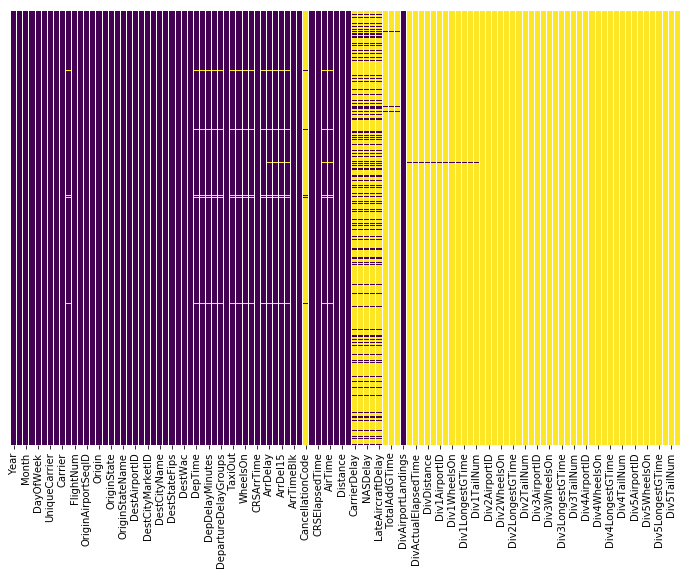

In [5]:
# To identify missing records in the dataset
# Yellow - missing values
plt.figure(figsize = (12, 8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Dropping columns that have more than 2/3 of missing entries
for i in df.columns:
    if df[i].isnull().sum() > 300000:
        df.drop(i, axis = 1, inplace = True)
df.columns        

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'DivAirportLandings'],
      dtype='object')

In [7]:
# Dropping columns that do not provide useful information for this analysis
for i in df.columns:
    if df[i].nunique() == 1:
        df.drop(i, axis = 1, inplace = True)
df.columns

Index(['DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'TailNum', 'FlightNum', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Distance', 'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

In [8]:
# Total number of rows and columns after deleting columns with 2/3 of missing values and no useful information
df.shape

(445827, 52)

### Analysis

The exploratory analysis was done to identify the features that look promising in the analysis to predict flight arrival delays. Our target variable is ArrDel15 - Arrival Delay Indicator, 15 Minutes or More (1=Yes)

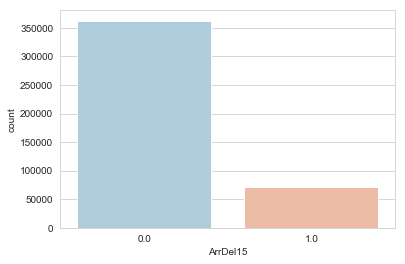

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='ArrDel15',data=df,palette='RdBu_r')

In [10]:
df.ArrDel15.value_counts()

0.0    362416
1.0     70882
Name: ArrDel15, dtype: int64

In [11]:
df.ArrDel15.value_counts(normalize=True)

0.0    0.836413
1.0    0.163587
Name: ArrDel15, dtype: float64

The dataset is very highly asymmetric, with positive arrival delays only making up 16% of the samples. This means that a classifier that predicts that there is no arrival delay has an accuracy of 84%.

The variable called cols was created to store the continuous variables that will be used in this analysis

In [12]:
cols =  ['TaxiOut','TaxiIn', 'AirTime', 'Distance']

The following plots were made to explore the categorical variables in the dataset to predict arrival delays

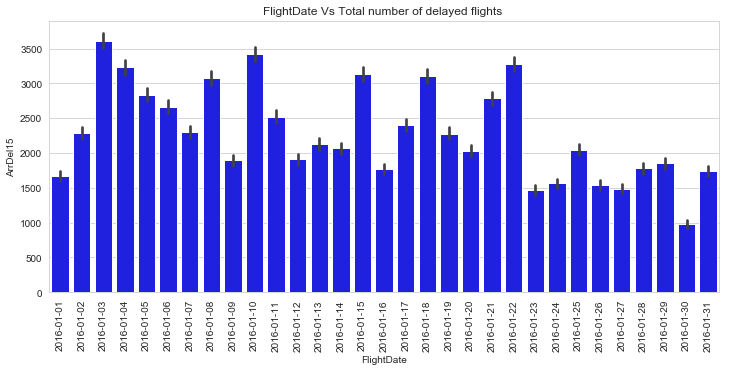

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=df, color = "blue" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

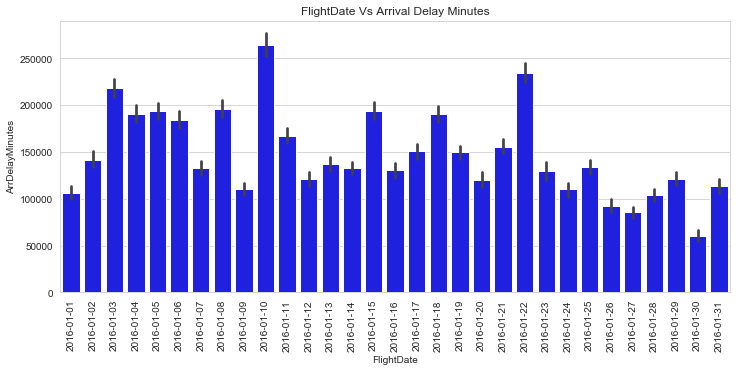

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDelayMinutes', data=df, color = "blue" , order = order , estimator = np.sum)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Arrival Delay Minutes")

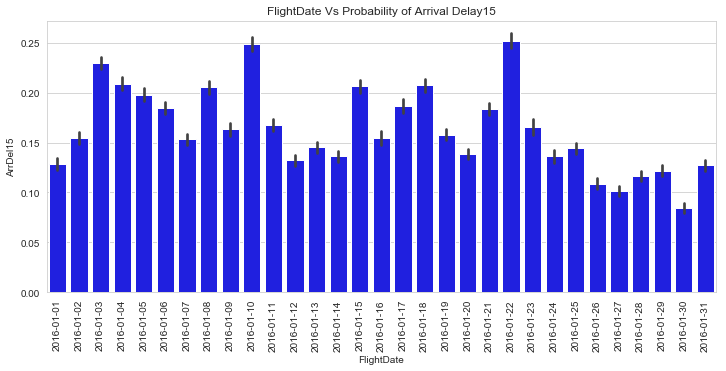

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))
order = np.unique(list(df['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=df, color = "blue" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Probability of Arrival Delay15")

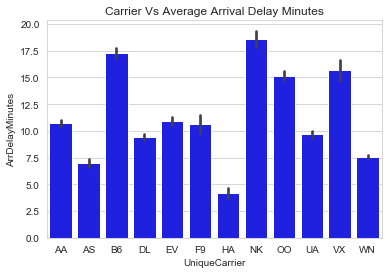

In [16]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(df['UniqueCarrier']))
sns.barplot(x='UniqueCarrier',y ='ArrDelayMinutes', data=df, color = "blue" , order = carrier_order)
fig = plt.title("Carrier Vs Average Arrival Delay Minutes")

The carriers B6 and NK seem to have longer arrival delays

In [17]:
carrier_grouped = df.groupby('UniqueCarrier').mean()

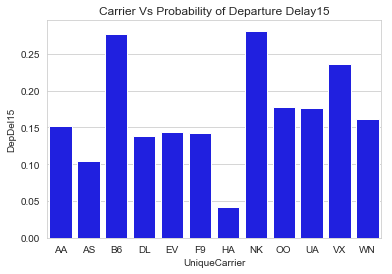

In [18]:
sns.set_style('whitegrid')
sns.barplot(x=carrier_grouped.index, y ="DepDel15", data=carrier_grouped, color ='blue')
fig = plt.title("Carrier Vs Probability of Departure Delay15")

The carriers B6 and NK seem to have higher number of flight departure delays

In [19]:
# Splitting month column into 5 weeks
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"

df['Month'] = df['DayofMonth'].apply(Impute_month)
df.drop("DayofMonth", axis = 1, inplace = True)    


In [20]:
df['Month'].head(3)

0     weekI
1     weekI
2    weekII
Name: Month, dtype: object

In [21]:
# Splitting week column into weekend and weekdays
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
df['Week'] = df["DayOfWeek"].apply(Impute_week)
df.drop("DayOfWeek", axis = 1, inplace = True)

In [22]:
df['Week'].head(3)

0    Weekdays
1    Weekdays
2    Weekdays
Name: Week, dtype: object

In [23]:
Month_grouped1 = df.groupby('Month')["ArrDel15"].sum()
Month_grouped2 = df.groupby('Month')["ArrDel15"].count()
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]

In [24]:
#Month_grouped["Average number of delays"]=df.groupby('Month')["ArrDel15"].mean()

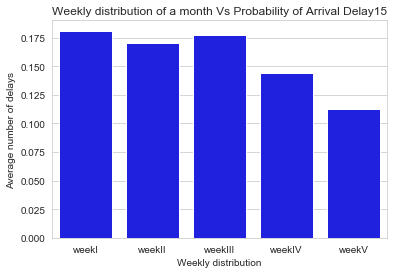

In [25]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='blue')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

The average number of delays appear to decrease towards the end of the month

In [26]:
week_grouped1 = df.groupby('Week')["ArrDel15"].sum()
week_grouped2 = df.groupby('Week')["ArrDel15"].count()
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of Arrival Delay15"] = week_grouped["sum"]/week_grouped["count"]

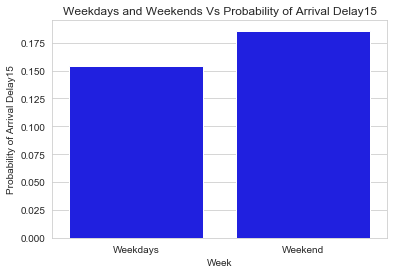

In [27]:
sns.set_style('whitegrid')
sns.barplot(x=week_grouped.index, y ='Probability of Arrival Delay15', data=week_grouped, color ='blue')
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Weekdays and Weekends Vs Probability of Arrival Delay15")

The average number of delays are less during weekdays compared to the weekend

In [28]:
airport_grouped1 = df.groupby('Origin')["ArrDel15"].sum()
airport_grouped2 = df.groupby('Origin')["ArrDel15"].count()
airport_grouped = pd.concat([airport_grouped1, airport_grouped2],axis=1, keys=["sum", "count"])
airport_grouped["Probability of Arrival Delay15"] = airport_grouped["sum"]/airport_grouped["count"]
airport_grouped.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

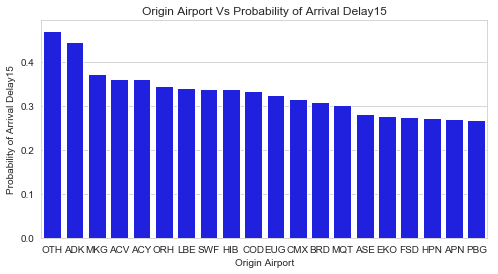

In [29]:
plt.figure(figsize = (8, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped.index[:20], y = "Probability of Arrival Delay15", data=airport_grouped[:20], color ='blue')
plt.xlabel("Origin Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Origin Airport Vs Probability of Arrival Delay15")

In [30]:
airport_grouped3 = df.groupby('Dest')["ArrDel15"].sum()
airport_grouped4 = df.groupby('Dest')["ArrDel15"].count()
airport_grouped_dest = pd.concat([airport_grouped3, airport_grouped4],axis=1, keys=["sum", "count"])
airport_grouped_dest["Probability of Arrival Delay15"] = airport_grouped_dest["sum"]/airport_grouped_dest["count"]
airport_grouped_dest.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

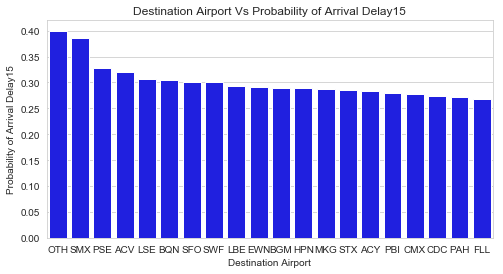

In [31]:
plt.figure(figsize = (8, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped_dest.index[:20], y ='Probability of Arrival Delay15', data=airport_grouped_dest[:20], color ='blue')
plt.xlabel("Destination Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Destination Airport Vs Probability of Arrival Delay15")

The Southwest Oregon Regional Airport (OTH) is the busiest airport with higher number of arrival delays

A new column called flight route was created with origin airport and destination airport

In [32]:
df["Flight_route"] = df["Origin"] + " to " + df["Dest"]
flightroute = df.groupby('Flight_route').sum()
flightroute.sort_values(by = "ArrDel15", axis = 0, ascending = False, inplace = True)
flightroute.head(2)

,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,...,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,DivAirportLandings
Flight_route,,,,,,,,,,,,,,,,,,,,,
LAX to SFO,28489647,2524880,18280856,1828089854,46191350,8508,129038,20945278,2094530636,46024026,...,510.0,1136.0,37.0,1.0,117840.0,115631.0,79669.0,477866.0,2836,1
SFO to LAX,29136143,2862386,21417950,2141797900,47062650,8700,131950,18693400,1869344350,47233750,...,424.0,760.0,35.0,0.0,123411.0,121610.0,77213.0,488650.0,2900,0


In [33]:
df["Flight_route"].nunique()

3995

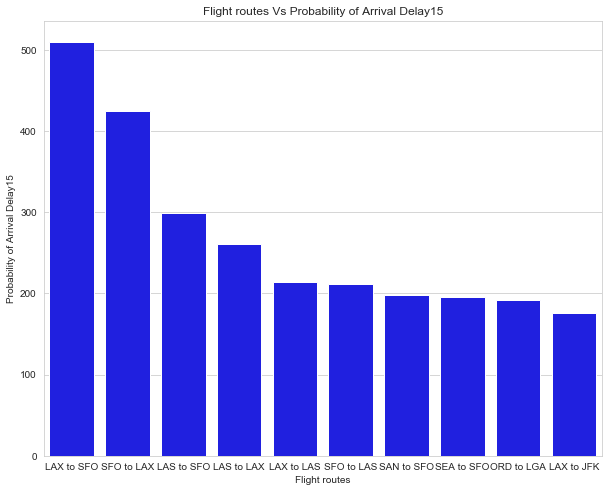

In [34]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ArrDel15", data=flightroute[:10], color ='blue')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

The plot above shows the top 10 flight routes with higher number of arrival delays. So it is important to include distance and airtime columns in this analysis to determine whether they play a major role in predicting flight arrivals

In [35]:
# Splitting Departure time and Arrival time columns into 3 categories : Morning, Afternoon, Evening
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"

In [36]:
df['Arrival_Time'] = df["CRSArrTime"].apply(impute_time)
df.drop("CRSArrTime", axis = 1, inplace = True)

df['Departure_Time'] = df["CRSDepTime"].apply(impute_time)
df.drop("CRSDepTime", axis = 1, inplace = True)

In [37]:
arrtime_grouped = df.groupby('Arrival_Time').mean()
deptime_grouped = df.groupby('Departure_Time').mean()

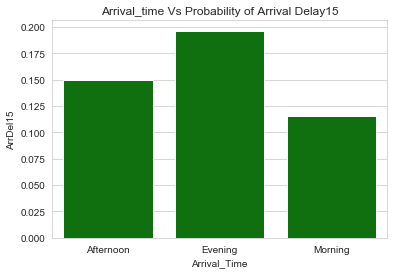

In [38]:
sns.set_style('whitegrid')
sns.barplot(x=arrtime_grouped.index, y ="ArrDel15", data=arrtime_grouped, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

The arrival flights appears to have more delays in the evening time

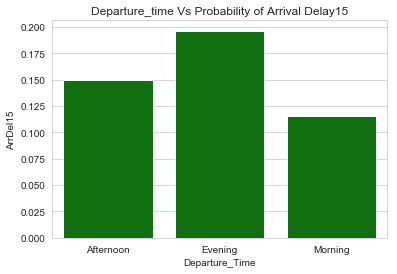

In [39]:
sns.set_style('whitegrid')
sns.barplot(x=deptime_grouped.index, y ="ArrDel15", data=arrtime_grouped, color ='green')
fig = plt.title("Departure_time Vs Probability of Arrival Delay15")

the departer flights appears to have more delays in the evening time

In [40]:
# dropping columns which do not hold any useful data and columns that contain repeated information
df_clean = df.drop(['FlightDate', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Departure_Time'], axis = 1)

In [41]:
df_clean.shape

(445827, 10)

In [42]:
df_clean.isnull().sum()

UniqueCarrier        0
Origin               0
TaxiOut          11600
TaxiIn           11907
ArrDel15         12529
AirTime          12529
Distance             0
Month                0
Week                 0
Arrival_Time         0
dtype: int64

In [43]:
# Dropping missing records
df_clean.dropna(axis = 0, inplace = True)

In [44]:
df_clean.shape

(433298, 10)

Upto 3% of values are missing in some of the columns. Hence the missing rows were dropped from the analysis instead of imputing these columns with its respective most frequent value

In [45]:
df_clean.isnull().sum()

UniqueCarrier    0
Origin           0
TaxiOut          0
TaxiIn           0
ArrDel15         0
AirTime          0
Distance         0
Month            0
Week             0
Arrival_Time     0
dtype: int64

In [46]:
check_cor = df_clean[cols]

In [47]:
# Calculating correlations between independent variables
print("Correlation Matrix")
print(check_cor.corr())
print("##############")

def get_pairs(df):
    ## Get diagonal and lower triangular pairs of correlation matrix
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    cal_corr = df.corr().abs().unstack()
    labels_to_drop = get_pairs(df)
    cal_corr = cal_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return cal_corr[0:n]
 
print("Top Absolute Correlations")
print(get_top_abs_correlations(check_cor, 2))

Correlation Matrix
           TaxiOut    TaxiIn   AirTime  Distance
TaxiOut   1.000000  0.007479  0.049890  0.037180
TaxiIn    0.007479  1.000000  0.101871  0.096430
AirTime   0.049890  0.101871  1.000000  0.982208
Distance  0.037180  0.096430  0.982208  1.000000
##############
Top Absolute Correlations
AirTime  Distance    0.982208
TaxiIn   AirTime     0.101871
dtype: float64


There is high correlation between distance and airtime, hence dropping the column airtime from the analysis

In [48]:
df_clean.drop(["AirTime"], axis = 1, inplace = True)

In [49]:
df_clean.columns

Index(['UniqueCarrier', 'Origin', 'TaxiOut', 'TaxiIn', 'ArrDel15', 'Distance',
       'Month', 'Week', 'Arrival_Time'],
      dtype='object')

In [50]:
indicator_var = pd.DataFrame()
categories = ['UniqueCarrier', 'Origin', 'Month', 'Week', 'Arrival_Time']

The categorical variables above are transformed into dummy variables using pd.get_dummies and the first category in each column was dropped from the analysis to prevent multicollinearity

In [51]:
for i in categories:
    x = pd.get_dummies(df_clean[i],drop_first=True)
    indicator_var = pd.concat([indicator_var, x],axis=1)

In [52]:
df_clean.drop(['UniqueCarrier', 'Origin','Month', 'Week', "Arrival_Time"], axis = 1, inplace = True)

At this point we completed investigating the entire dataset and worked seperately on continuous and categorical variables. Now, its time to merge both kinds of variables

In [53]:
# The dataframes with categorical and quantitative are concatenated to get the final data frame to run binary classifiers
final_data = pd.concat([indicator_var, df_clean],axis=1)

In [54]:
print ("The final number of rows used in the classification: ", len(final_data)) # Rows Count
print ("The final number of columns used in the classification: ",(final_data.shape[1])) # Columns Count

The final number of rows used in the classification:  433298
The final number of columns used in the classification:  315


In [55]:
#df_x=final_data.loc[:,final_data.columns!='ArrDell15']
#df_y=final_data.loc[:,final_data.columns=='ArrDell15']

In [56]:
# Separate features from labels
features = []
for i in final_data.columns:
    if i != "ArrDel15":
        features.append(i)
      

In [57]:
len(features)

314

In [58]:
final_data["ArrDel15"].value_counts()

0.0    362416
1.0     70882
Name: ArrDel15, dtype: int64

In [59]:
final_data["ArrDel15"].value_counts(normalize=True)

0.0    0.836413
1.0    0.163587
Name: ArrDel15, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:

x_train,x_test,y_train,y_test  = train_test_split(final_data[features],final_data['ArrDel15'], train_size=0.7, random_state=4)


c:\users\hp\appdata\local\conda\conda\envs\cv-nd\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [62]:
def classify(clf, param, x = x_train, y = y_train, cv=5):
    gs = GridSearchCV(clf, param_grid=param)
    gs.fit(x, y)
    best = gs.best_estimator_
    return print(best)

In [63]:
def model_evaluation_report(clf):
    classify(clf,param)
    clf.fit(x_train,y_train)
    prob_y = [p[1] for p in clf.predict_proba(x_test) ]
    print("######### Accuracy #########")
    print("train_acc:",clf.score(x_train,y_train))
    print("test_acc:",clf.score(x_test,y_test))
    print('########## confusion matrix ###########')
    print (confusion_matrix(y_test, clf.predict(x_test)))
    print('######## Classification report ##########')
    print (classification_report(y_test,clf.predict(x_test)))
    print ("########## Area under the curve ########")
    print( roc_auc_score(y_test, prob_y) )
    
    return ("done")

In [64]:
#descision tree
dt = DecisionTreeClassifier()
param = {"max_depth": list(range(1,10,1))}
model_evaluation_report(dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
######### Accuracy #########
train_acc: 0.9950743138987432
test_acc: 0.7750057696745903
########## confusion matrix ###########
[[93667 15202]
 [14045  7076]]
######## Classification report ##########
             precision    recall  f1-score   support

        0.0       0.87      0.86      0.86    108869
        1.0       0.32      0.34      0.33     21121

avg / total       0.78      0.78      0.78    129990

########## Area under the curve ########
0.5982196557940522


'done'

In [65]:
# Changing split criterion to entropy and re-running the decision tree
dt_entropy = DecisionTreeClassifier()
param = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
model_evaluation_report(dt_entropy)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
######### Accuracy #########
train_acc: 0.9950743138987432
test_acc: 0.7748288329871529
########## confusion matrix ###########
[[93660 15209]
 [14061  7060]]
######## Classification report ##########
             precision    recall  f1-score   support

        0.0       0.87      0.86      0.86    108869
        1.0       0.32      0.33      0.33     21121

avg / total       0.78      0.77      0.78    129990

########## Area under the curve ########
0.5979687610202279


'done'

In [66]:
rf = RandomForestClassifier()
param = {"n_estimators": list(range(1,10,1))}
model_evaluation_report(rf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
######### Accuracy #########
train_acc: 0.975595764041832
test_acc: 0.8383106392799446
########## confusion matrix ###########
[[104173   4696]
 [ 16322   4799]]
######## Classification report ##########
             precision    recall  f1-score   support

        0.0       0.86      0.96      0.91    108869
        1.0       0.51      0.23      0.31     21121

avg / total       0.81      0.84      0.81    129990

########## Area under the curve ########
0.6927945795828725


'done'

In [67]:
rf_entropy = RandomForestClassifier()
param = {"criterion": ['entropy'], "n_estimators": list(range(1,10,1))}
model_evaluation_report(rf_entropy)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
######### Accuracy #########
train_acc: 0.9756452187215635
test_acc: 0.8389568428340641
########## confusion matrix ###########
[[104363   4506]
 [ 16428   4693]]
######## Classification report ##########
             precision    recall  f1-score   support

        0.0       0.86      0.96      0.91    108869
        1.0       0.51      0.22      0.31     21121

avg / total       0.81      0.84      0.81    129990

########## Area under the curve ########
0.6931074734115732


'done'

In [68]:
importance_features = list(zip(features, rf.feature_importances_))
importance_features = pd.DataFrame(importance_features, columns = ["features", "importance"])
importance_features.sort_values(by = ["importance"], ascending = False, inplace = True)
importance_features[:20]


,features,importance
311,TaxiOut,0.301269
313,Distance,0.226443
312,TaxiIn,0.200076
308,Weekend,0.017663
304,weekII,0.015823
305,weekIII,0.012712
309,Evening,0.012452
306,weekIV,0.009291
310,Morning,0.009056
307,weekV,0.006132


### Balancing Data

In [69]:
df = final_data
treshold = df.ArrDel15.value_counts().mean()
treshold


216649.0

In [70]:
# Separate majority and minority classes
df_ontime = df[df.ArrDel15==0]
df_delayed = df[df.ArrDel15==1]

# downsample ontime class
from sklearn.utils import resample
df_ontime_downsampled = resample(df_ontime, 
                                 replace=False,       # sample with replacement
                                 n_samples= 216649, # to match treshold
                                random_state = 100)  

# upsample delayed class
df_delayed_upsampled= resample(df_delayed, 
                                 replace=True,       # sample with replacement
                                 n_samples= 216649, # to match treshold
                                random_state = 100) 
                                 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_delayed_upsampled,df_ontime_downsampled ])
df_balanced.ArrDel15.value_counts()

0.0    216649
1.0    216649
Name: ArrDel15, dtype: int64

In [71]:
x_train,x_test,y_train,y_test = train_test_split(df_balanced[features],df_balanced['ArrDel15'], train_size=0.7, random_state=4)


c:\users\hp\appdata\local\conda\conda\envs\cv-nd\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [72]:
dt_balanced = DecisionTreeClassifier()
param = {"max_depth": list(range(1,10,1))}
model_evaluation_report(dt_balanced)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
######### Accuracy #########
train_acc: 0.9959282313687736
test_acc: 0.8481806292791754
########## confusion matrix ###########
[[49707 15127]
 [ 4608 60548]]
######## Classification report ##########
             precision    recall  f1-score   support

        0.0       0.92      0.77      0.83     64834
        1.0       0.80      0.93      0.86     65156

avg / total       0.86      0.85      0.85    129990

########## Area under the curve ########
0.8506084465909152


'done'

In [73]:
rf_balanced = RandomForestClassifier()
param = {"n_estimators": list(range(1,10,1))}
model_evaluation_report(rf_balanced)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
######### Accuracy #########
train_acc: 0.9903728223456025
test_acc: 0.8801446265097315
########## confusion matrix ###########
[[54901  9933]
 [ 5647 59509]]
######## Classification report ##########
             precision    recall  f1-score   support

        0.0       0.91      0.85      0.88     64834
        1.0       0.86      0.91      0.88     65156

avg / total       0.88      0.88      0.88    129990

########## Area under the curve ########
0.9417873577060175


'done'

In [74]:
importance_features = list(zip(features, rf_balanced.feature_importances_))
importance_features = pd.DataFrame(importance_features, columns = ["features", "importance"])
importance_features.sort_values(by = ["importance"], ascending = False, inplace = True)
importance_features[:20]


,features,importance
311,TaxiOut,0.258539
313,Distance,0.217715
312,TaxiIn,0.178386
308,Weekend,0.019254
309,Evening,0.016388
304,weekII,0.016101
306,weekIV,0.014858
310,Morning,0.014275
305,weekIII,0.013284
1,B6,0.008155


c:\users\hp\appdata\local\conda\conda\envs\cv-nd\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


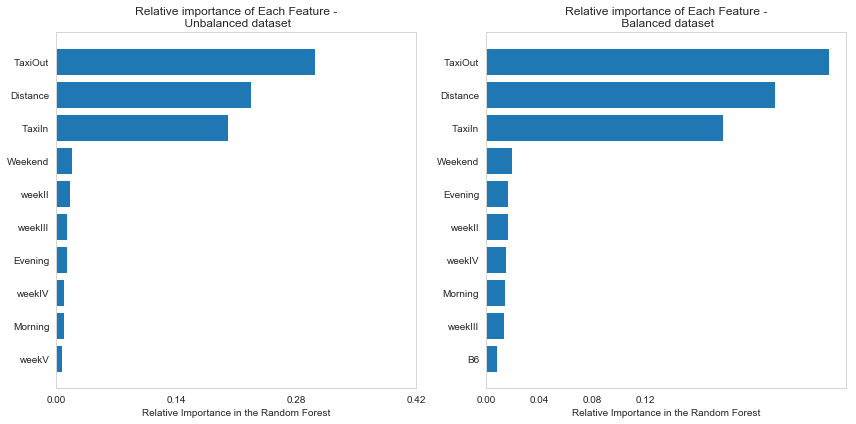

In [75]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6), tight_layout = True)
ax = axes.ravel() 
plt1 = ax[0]

importance_list = rf.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt1.barh(range(len(name_list)),importance_list,align='center')
plt1.set_yticks(range(len(name_list)))
plt1.set_yticklabels(name_list)
plt1.set_xticks([0, 0.14 ,0.28, 0.42])
plt1.set_xlabel('Relative Importance in the Random Forest')
plt1.set_title('Relative importance of Each Feature -\n Unbalanced dataset')
plt1.grid(False)


plt2 = ax[1]

importance_list = rf_balanced.feature_importances_
name_list = features
importance_list, name_list = zip(*sorted(zip(importance_list, name_list) )[-10:])
plt2.barh(range(len(name_list)),importance_list,align='center')
plt2.set_yticks(range(len(name_list)))
plt2.set_yticklabels(name_list)
plt2.set_xticks([0, 0.04 ,0.08, 0.12])
plt2.set_xlabel('Relative Importance in the Random Forest')
plt2.set_title('Relative importance of Each Feature -\n Balanced dataset')
plt2.grid(False)